Jacqueline Sanchez <br>
June 25, 2024 <br> 
Homework 4

# Neural Networks

Your task for this homework will be to construct a neural network for both a regression
and classification task. We'll be using the california dataset for the regression portion,
and iris for classification.By the end of this hw you should be comfortable using sklearn'sneural network on a dataset.

In [62]:
# dataset importation
from sklearn.datasets import fetch_california_housing, load_iris

# tools 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# plotting tools
import seaborn as sns # to use rcParams
import matplotlib.pyplot as plt


In [48]:
from matplotlib import rcParams # need sb
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

## Artificial Neural Network for Regressional Task

### Part 1: Reading and Understanding the Data (Regression Part)

In [23]:
# loading california housing dataset
cali_housing = fetch_california_housing()
cali_features = pd.DataFrame(cali_housing.data, columns = cali_housing.feature_names)

# create a dataframe for the target
cali_target = pd.DataFrame(cali_housing.target, columns=["target"])

# concat both dataframes
california_df = pd.concat([cali_features, cali_target], axis = 1)

###### Preparaing data for training ######

# Saving data into df X
X = california_df.drop('target', axis = 1)

# Target/labels variable into Y
y = california_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print(cali_housing.keys())
# print(california_df.head())

#### To Do: 

In [25]:
# 1. Print some basic statistics of your data
print(california_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [37]:
# 2. Print some general info using pandas 
print("Basic Information: ")
print(california_df.info())

print("\nData types of each column: ")
print(california_df.dtypes)

print("\nMissing values in the dataset: ")
print(california_df.isnull().sum())

Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Data types of each column: 
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

Missing values in the dataset: 
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitu

<span style = 'color:green'>
No, there are no missing values in this dataset as I added all the na values in the dataset but there were none. 

### Part 2 Visualization

([<matplotlib.axis.YTick at 0x17c455450>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5')])

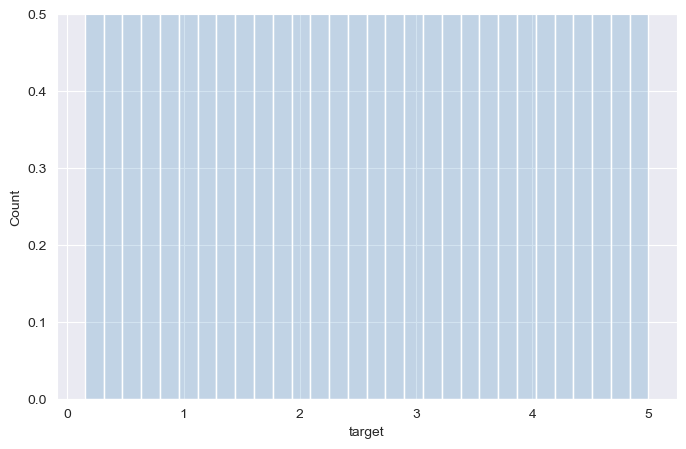

In [64]:
# histogram of the median house value(y)


sns.histplot(y, bins = 30, kde = True, alpha = 0.2)

# Adjusting the y-axis limits and ticks
plt.ylim(0, 0.5)  # Setting y-axis limits from 0 to 0.5
tick_values = np.arange(0, 0.6, 0.1)  # Creating ticks from 0 to 0.5 with an interval of 0.1
plt.yticks(tick_values)